<a href="https://colab.research.google.com/github/YahiaML/TMDb-movies-data-investigation/blob/main/TMDb_movies_data_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project: Investigate a Dataset - [TMDb movie data]

To see the analysis report: https://drive.google.com/file/d/1Ow6-BOgrP4qmlJlximXFSk1tB2f7exVG/view?usp=sharing 

click on icon.PNG icon to see the table of contents

**Note:**

This data was cleaned from original data on Kaggle: https://www.kaggle.com/tmdb/tmdb-movie-metadata.

#Introduction

## Dataset Description

**TMDb movie data** is a dataset containing 21 columns for 10866 Movies,

which are :



```
[id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj]
```

***These columns can be classified as the following :***

**1.** Significant columns for this analysis :
```
['popularity', 'budget', 'revenue', 'genres', 'vote_average' ]
```

**2.** Helpful columns for this analysis :
```
['original_title', 'cast','director','runtime', 'production_companies', 'release_date',
        'vote_count', 'release_year', 'budget_adj','revenue_adj]
```
**3.** Columns have nothing to provide us for this analysis: 

```
["id", 	"imdb_id", 	"homepage", "tagline", "keywords",	"overview"]
```



##Question(s) for Analysis

1. Which genres are most popular from year to year?
2. Are the high revenue related to the high popularity?
3. Which properties affects the movie vote average?
4. Which stars have the highest vote average movies?
5. Which directors have the highest vote average movies?


# Data Wrangling

## General Properties

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/YahiaML/TMDb-movies-data-investigation/main/tmdb-movies.csv")

Having a general look at the data

In [ ]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


* columns `["id",     "imdb_id",     "homepage", "tagline", "keywords",    "overview"]` are useless


Having a look at the data type of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

* **release_date** type needs to be changed


Checking if there is any missing data

In [ ]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* **Cast, homepage, director, tagline, overview, keywords, genres ,and production_companies** columns  have missing data

Checking if there is any duplicate rows

In [ ]:
sum(df.duplicated())

1

* There is one Duplicate row that needs to be deleted

***Wrangling Conclusions :***

* colomns `["id",     "imdb_id",     "homepage", "tagline", "keywords",    "overview"]` are useless

* **release_date** type needs to be changed

* **Cast, homepage, director, tagline, overview, keywords, geners, production_companies** have missing data

* There is one Duplicate row that needs to be deleted


## Data Cleaning

### **1. Remove usless columns**


Columns:
```
["id", 	"imdb_id", 	"homepage", "tagline", "keywords",	"overview"]
```

have nothing to do with our analysis.

So I'll drop them


In [ ]:
df.drop(["id", "imdb_id", "homepage", "tagline", "keywords", "overview"], axis = 1,inplace= True)

In [ ]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

### **2. Handle wrong formats**


release_date is formatted as object

I'll convert it to date_time format

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10866 non-null  float64       
 1   budget                10866 non-null  int64         
 2   revenue               10866 non-null  int64         
 3   original_title        10866 non-null  object        
 4   cast                  10790 non-null  object        
 5   director              10822 non-null  object        
 6   runtime               10866 non-null  int64         
 7   genres                10843 non-null  object        
 8   production_companies  9836 non-null   object        
 9   release_date          10866 non-null  datetime64[ns]
 10  vote_count            10866 non-null  int64         
 11  vote_average          10866 non-null  float64       
 12  release_year          10866 non-null  int64         
 13  budget_adj      

### **3. remove Duplicates**

In [ ]:
sum(df.duplicated())

1

In [ ]:
df[df.duplicated() == True]

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
sum(df.duplicated())

0

### **4. Handle NAN Values**

In [ ]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

All the NAN values can not be replaced as they all are strings ( can not be filled by mean, mode, ... ect )

So, I'll drop them all

In [ ]:
df.dropna(axis= 0 , inplace = True)

In [ ]:
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

# Exploratory Data Analysis

In [ ]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


**Note1:** *budget, revenue,	runtime, budget_adj, revenue_adj*  
 have zero values.


---
**Note2:** About 25% of the data have 0 budget!!!


---

**Note3:** About 50% of the data have 0 revenue!!!


---
**Note4:** Movie budget has positive correlation with popularity.


---

**Note5:** Movie popularity has no relation with the revenue.


---
**Note6:** Vote average has positive correlation with vote counts and both have positive correlation with the popularity.


---





##Research Question 1 (Which genres are most popular from year to year?)

In [ ]:
df["genres"].value_counts()

Drama                             638
Comedy                            615
Drama|Romance                     272
Comedy|Drama                      255
Comedy|Romance                    248
                                 ... 
Thriller|Horror|Crime               1
Drama|Thriller|Fantasy|Mystery      1
Family|Action|Drama                 1
Thriller|War|Adventure|Drama        1
Action|Comedy|Drama|War             1
Name: genres, Length: 1916, dtype: int64

genres contains multiple values separated by pipe (|) characters

So, we can Analyse the data with two methods

In [ ]:
# insert the year you want to see which genres are the most popular in this year

year = 1999   

### **Methode 1 :** Analysing them as they are

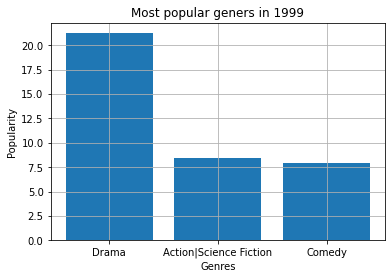

In [ ]:
selected_year = df[df["release_year"] == year] 

# Creating a list for Movies geners :
geners_list = []

for gener in selected_year['genres'] :  
    if gener not in geners_list :
      geners_list.append(gener)

# Creating a list for the popularity for each gener :
popularity_list = []

for gener in geners_list :
    gener_name = selected_year[selected_year['genres']== gener]
    popularity_sum = gener_name["popularity"].sum()
    popularity_list.append(popularity_sum)

# Sorting geners descendingly according to popularity sum :

sorted_popularity_list = sorted(popularity_list, reverse=True)

sorted_geners_list = []

for value in sorted_popularity_list :

    popularity_value_index = popularity_list.index(value)
    crosponding_gener = geners_list[popularity_value_index]
    sorted_geners_list.append(crosponding_gener) 


# Plotting :

#plt.subplots(figsize=(8,10))
plt.bar(sorted_geners_list[:3],sorted_popularity_list[:3])
def plt_show(X,Y,title,grid=True) :
    plt.title(title)
    plt.xlabel(X.title())
    plt.ylabel(Y.title())
    plt.grid(grid)
    plt.show()

plt_show("Genres","popularity","Most popular geners in {}".format(year))


This method isn't accurate at all because :

In [ ]:
df['genres'].value_counts().count()

1916

We have 1916 deffirent gener

So, we are going to analyse them throgh the follwing methode

### **Methode 2:** Cleaning the genres then analyse

We have to clean geners column (return to the cleaning step again)

In [ ]:
df['genres'].value_counts().count()

1916

In [ ]:
df['genres'] = df['genres'].apply(lambda x: x.split("|")[0])

In [ ]:
df['genres'].value_counts().count()

20

In [ ]:
df['genres'].value_counts()

Drama              2223
Comedy             2084
Action             1479
Horror              853
Adventure           550
Thriller            474
Crime               361
Animation           346
Documentary         264
Fantasy             253
Science Fiction     196
Romance             161
Family              128
Mystery             118
Music                79
TV Movie             59
War                  57
Western              42
History              39
Foreign               6
Name: genres, dtype: int64

Now this is more reasonable

We have 20 Movie genres instead of 1916

Now lets see Which genres are most popular from year to year

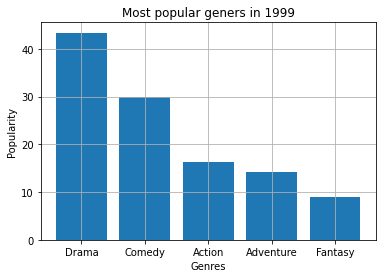

In [ ]:
selected_year = df[df["release_year"] == year] 

# Creating a list for Movies geners in the choosen year :
geners_list = []

for gener in selected_year['genres'] :  
    if gener not in geners_list :
        geners_list.append(gener)

# Creating a list for the sum of popularity for each gener :
popularity_list = []

for gener in geners_list :
    gener_name = selected_year[selected_year['genres']== gener]
    popularity_sum = gener_name["popularity"].sum()
    popularity_list.append(popularity_sum)

# Sorting geners descendingly according to popularity sum :

sorted_popularity_list = sorted(popularity_list, reverse=True)
sorted_geners_list = []

for value in sorted_popularity_list :

    popularity_value_index = popularity_list.index(value)
    crosponding_gener = geners_list[popularity_value_index]
    sorted_geners_list.append(crosponding_gener) 

# plotting the result:
#plt.subplots(figsize=(8,10))
plt.bar(sorted_geners_list[:5],sorted_popularity_list[:5])
plt_show("Genres","popularity","Most popular geners in {}".format(year))

Now it's easy to see which genres are most popular from year to year

##Research Question 2 (Are the high revenue related to the high popularity?)

lets see if there is any relation between the popularity and the revenue

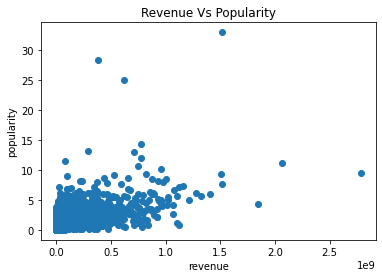

In [ ]:
plt.scatter(df["revenue"],df["popularity"])
plt.title("Revenue Vs Popularity")
plt.xlabel("revenue")
plt.ylabel("popularity")
plt.show()

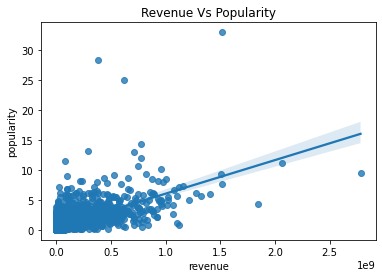

In [ ]:
# draw regplot
sns.regplot(x = df["revenue"],
            y = df["popularity"])
# show the plot
plt.title("Revenue Vs Popularity")
plt.xlabel("revenue")
plt.ylabel("popularity")
plt.show()

As we can see there is a positive relation between the popularity of the movie and its revenue

But there are alot of zero revenues ( about 25% of the revenue )

So, I'll plot the revenues ( which are not equal zero ) to see if this affects the relation 

In [ ]:
df["revenue"].count()

9772

In [ ]:
filtered_revenue = df[df["revenue"]!= 0]

In [ ]:
filtered_revenue["revenue"].count()

4750

In [ ]:
filtered_revenue.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4750.000000,4.750000e+03,4.750000e+03,4750.000000,4750.000000,4750.000000,4750.000000,4.750000e+03,4.750000e+03
mean,1.061915,3.012598e+07,9.099524e+07,108.148842,444.832211,6.150779,2000.828211,3.582289e+07,1.173732e+08
std,1.365645,4.074516e+07,1.632905e+08,21.109376,812.642537,0.796427,11.627617,4.396234e+07,2.002779e+08
min,0.001783,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,0.401945,2.000000e+06,8.501551e+06,95.000000,50.000000,5.600000,1994.000000,2.921208e+06,1.163858e+07
50%,0.694424,1.563747e+07,3.331677e+07,105.000000,153.000000,6.200000,2004.000000,2.103337e+07,4.584735e+07
75%,1.226349,4.000000e+07,1.015876e+08,118.000000,446.000000,6.700000,2010.000000,5.040280e+07,1.349884e+08
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


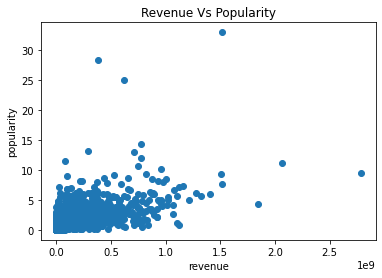

In [ ]:
plt.scatter(filtered_revenue["revenue"],filtered_revenue["popularity"])
plt.title("Revenue Vs Popularity")
plt.xlabel("revenue")
plt.ylabel("popularity")
plt.show()

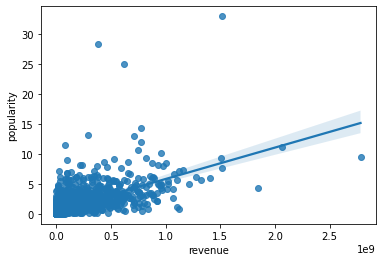

In [ ]:
# draw regplot
sns.regplot(x = filtered_revenue["revenue"],
            y = filtered_revenue["popularity"],
            )
# show the plot
plt.show()

That didnt change any thing.

So, the final conclusion is :

There is a positive correlation between revenue and popularity

##Research Question 3 ( Which properties affects the movie vote average?)

In [ ]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


From this slight statistics I think that: 

* popularity have positive effect on ( positive correlation or proportional with ) the vote average

* Budgit have positive effect on ( positive correlation or proportional with ) the vote average


So, lets see:

### 1. Popularity and vote average

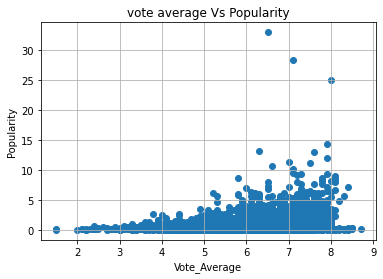

In [ ]:
plt.scatter(df["vote_average"],df["popularity"])
"""
plt.title("vote average Vs Popularity")
plt.xlabel("vote_average")
plt.ylabel("popularity")
plt.show()"""
plt_show("vote_average","popularity","vote average Vs Popularity")

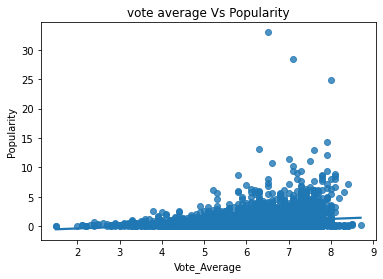

In [ ]:
# draw regplot
sns.regplot(x =df["vote_average"],
            y = df["popularity"]
            )
# show the plot
plt_show("vote_average","popularity","vote average Vs Popularity",grid=False)

There is a very weak relation between the popularity and the vote average

But there are some outlayrs in popularity, lets remove them then plot the relation again

In [ ]:
df_without_outlayrs = df[df["popularity"]<= 20]

In [ ]:
df_without_outlayrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9769 entries, 2 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9769 non-null   float64       
 1   budget                9769 non-null   int64         
 2   revenue               9769 non-null   int64         
 3   original_title        9769 non-null   object        
 4   cast                  9769 non-null   object        
 5   director              9769 non-null   object        
 6   runtime               9769 non-null   int64         
 7   genres                9769 non-null   object        
 8   production_companies  9769 non-null   object        
 9   release_date          9769 non-null   datetime64[ns]
 10  vote_count            9769 non-null   int64         
 11  vote_average          9769 non-null   float64       
 12  release_year          9769 non-null   int64         
 13  budget_adj       

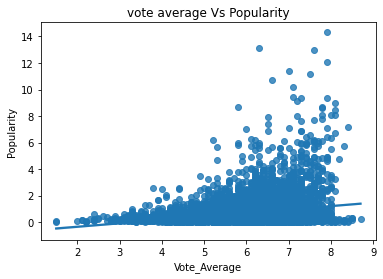

In [ ]:
# draw regplot
sns.regplot(x =df_without_outlayrs["vote_average"],
            y = df_without_outlayrs["popularity"]
            )
# show the plot
plt_show("vote_average","popularity","vote average Vs Popularity",grid=False)

Final conclusion: 
There's no strong relation between the popularity and tha vote average ( There is a very weak relation )

### 2. Budget and vote average

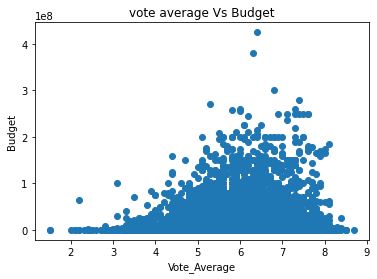

In [ ]:
plt.scatter(df["vote_average"],df["budget"])
plt_show("vote_average","budget","vote average Vs Budget",grid=False)

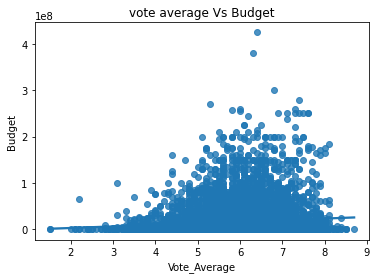

In [ ]:
# draw regplot
sns.regplot(x =df["vote_average"],
            y = df["budget"]
            )
# show the plot
plt_show("vote_average","budget","vote average Vs Budget",grid=False)

There is a very weak relation between the budjet and the vote average

But may be this is due to the zero budgets ( about 50% of the budget )

So, I'll plot the budget ( which are not equal zero ) to see if there is a relation between the budget and the vote average

In [ ]:
df["budget"].count()

9772

In [ ]:
filtered_budget = df[df["budget"]!= 0]

In [ ]:
filtered_budget["budget"].count()

5021

In [ ]:
filtered_budget.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,5021.000000,5.021000e+03,5.021000e+03,5021.000000,5021.000000,5021.000000,5021.000000,5.021000e+03,5.021000e+03
mean,1.014609,3.148929e+07,8.258191e+07,107.523203,419.964151,6.043696,2001.135033,3.778790e+07,1.051213e+08
std,1.342024,3.920818e+07,1.612449e+08,22.387081,797.038148,0.867978,11.845927,4.220942e+07,1.980250e+08
min,0.002514,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,0.000000e+00
25%,0.362240,6.300000e+06,7.306000e+03,94.000000,39.000000,5.500000,1995.000000,8.890145e+06,7.729969e+03
50%,0.642207,1.800000e+07,2.305712e+07,103.000000,131.000000,6.100000,2004.000000,2.374361e+07,3.136790e+07
75%,1.178831,4.000000e+07,9.299184e+07,117.000000,418.000000,6.600000,2010.000000,5.082002e+07,1.173373e+08
max,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


There is no zero budget now

So, lets see if there is any relation between budget and vote average

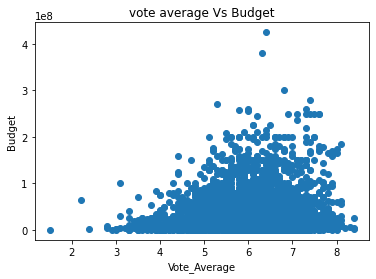

In [ ]:
plt.scatter(filtered_budget["vote_average"],filtered_budget["budget"])
plt_show("vote_average","budget","vote average Vs Budget",grid=False)

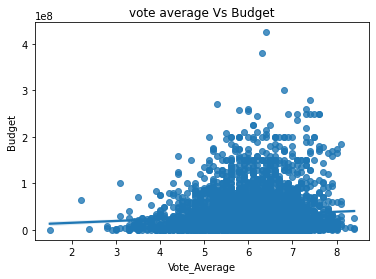

In [ ]:
# draw regplot
sns.regplot(x =filtered_budget["vote_average"],
            y = filtered_budget["budget"]
            )
# show the plot
plt_show("vote_average","budget","vote average Vs Budget",grid=False)

There is a very weak relation between the budjet and the vote average

##Research Question 4 (Which stars have the highest vote average movies?)

We have to clean the cast column (return to the cleaning step again)

Usually the star name is the first mentiond name in the cast

So, I'll strip the first name in each Moveie cast and create a new column called "movie_star" 

In [ ]:
df['cast'].count()

9772

In [ ]:
df['movie_star'] = df['cast'].apply(lambda x: x.split("|")[0])

In [ ]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_star
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy


In [ ]:
df['movie_star'].count()

9772

In [ ]:
df['movie_star'].value_counts()

Nicolas Cage           50
Robert De Niro         42
Bruce Willis           39
Clint Eastwood         38
Johnny Depp            37
                       ..
Mikhail Baryshnikov     1
Barbara Cupisti         1
Caio Blat               1
Harley Sylvester        1
Ambyr Childers          1
Name: movie_star, Length: 3798, dtype: int64

Now lets see who are the most voted stars

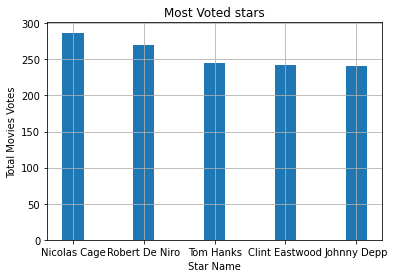

In [ ]:
# Creating a list for the Movies stars :

star_list = []

for star in df['movie_star'] :  
    if star not in star_list :
        star_list.append(star)

# Creating a list for the sum of vote_average for each star :
vote_average_sum_list = []

for star in star_list :
    filtered_by_star = df[df["movie_star"]== star]
    vote_average_sum = filtered_by_star["vote_average"].sum()
    vote_average_sum_list.append(vote_average_sum)

# Get the number of votes for each star :
num_of_votes_list = []

for star in star_list :
    num_of_votes = df[df["movie_star"] == star].shape[0]
    num_of_votes_list.append(num_of_votes)

# Sorting stars descendingly according to average of votes :

sorted_average_of_votes_list = sorted(vote_average_sum_list, reverse=True)

sorted_stars_list = []

for value in sorted_average_of_votes_list :

    original_average_vote_index = vote_average_sum_list.index(value)
  
    star = star_list[original_average_vote_index]
    sorted_stars_list.append(star) 
  
# plotting the result:

plt.bar(sorted_stars_list[:5],sorted_average_of_votes_list[:5],width=0.3)
plt_show("Star Name","Total Movies votes","Most Voted stars")



This statistic shows the stars who have the most voted movies , but there are alot of stars who have little number of movies which affect their rate

So we have to get the average votes for the movies for each star

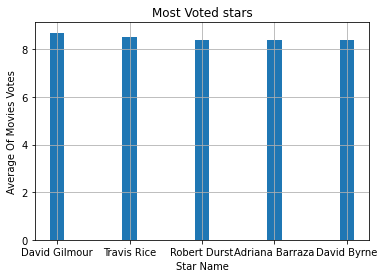

In [ ]:
# Get the average votes for each star :

average_of_votes_list = []

for i in range(len(star_list)) :

    average_of_votes = vote_average_sum_list[i] / num_of_votes_list[i]
    average_of_votes_list.append(average_of_votes)

# Sorting stars descendingly according to average of votes :

sorted_average_of_votes_list = sorted(average_of_votes_list, reverse=True)

sorted_stars_list = []


copy_of_average_of_votes_list =  average_of_votes_list.copy()

for value in sorted_average_of_votes_list :
    find_index = copy_of_average_of_votes_list.index(value)
  
    star = star_list[find_index]
    copy_of_average_of_votes_list[find_index] = "used" # I added this line due to the presence of many stars
                                                       # who have the same votes
    sorted_stars_list.append(star)

 
# plotting the result:

plt.bar(sorted_stars_list[:5],sorted_average_of_votes_list[:5],width=0.2)
plt_show("Star Name","Average of Movies votes","Most Voted stars")


##Research Question 5 (Which directors have the highest vote average movies?)

In [ ]:
df['director'] = df['director'].apply(lambda x: x.split("|")[0])

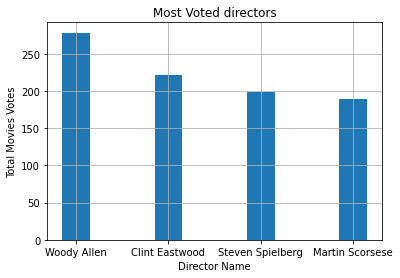

In [ ]:
# Creating a list for the Movies Directors :

directors_list = []

for director in df['director'] :  
    if director not in directors_list :
        directors_list.append(director)

# Creating a list for the sum of vote_average for each director :
vote_average_sum_list = []

for director in directors_list :
    filtered_by_director = df[df["director"]== director]
    vote_average_sum = filtered_by_director["vote_average"].sum()
    vote_average_sum_list.append(vote_average_sum)

# Get the number of votes for each director :
num_of_votes_list = []

for director in directors_list :
    num_of_votes = df[df["director"] == director].shape[0]
    num_of_votes_list.append(num_of_votes)
  
# Sorting directors descendingly according to average of votes :

sorted_average_of_votes_list = sorted(vote_average_sum_list, reverse=True)

sorted_directors_list = []

for value in sorted_average_of_votes_list :

    original_average_vote_index = vote_average_sum_list.index(value)
  
    director = directors_list[original_average_vote_index]
    sorted_directors_list.append(director) 
  
# plotting the result:

plt.bar(sorted_directors_list[:4],sorted_average_of_votes_list[:4],width=0.3)
plt_show("director Name","Total Movies votes","Most Voted directors")


This statistic shows the directors who have the most voted movies , but there are alot of directors who have little number of movies which affect their rate

So we have to get the average votes for the movies for each director

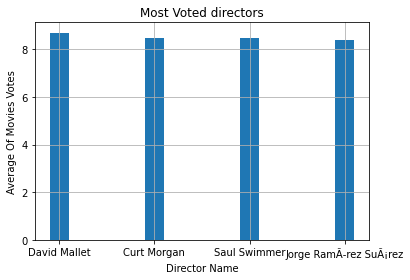

In [ ]:
# Get the average votes for each director :

average_of_votes_list = []

for i in range(len(directors_list)) :

    average_of_votes = vote_average_sum_list[i] / num_of_votes_list[i]
    average_of_votes_list.append(average_of_votes)

# Sorting directors descendingly according to average of votes :

sorted_average_of_votes_list = sorted(average_of_votes_list, reverse=True)

sorted_directors_list = []


copy_of_average_of_votes_list =  average_of_votes_list.copy()

for value in sorted_average_of_votes_list :
    find_index = copy_of_average_of_votes_list.index(value)
  
    director = directors_list[find_index]
    copy_of_average_of_votes_list[find_index] = "used" # I added this line due to the presence of many directors
                                                       # who have the same votes
    sorted_directors_list.append(director)

 
# plotting the result:

plt.bar(sorted_directors_list[:4],sorted_average_of_votes_list[:4],width=0.2)
plt_show("director Name","Average of Movies votes","Most Voted directors")


#Conclusions

After analyzing this dataset we found :

1. The most popular genres of movies in each year 
2. There is a poisitive correlation between movie revenues and popularity
3. There's no strong relation between the popularity and tha vote average
4. There's no strong relation between the Budget and tha vote average
5. Nicolas Cage movies is the highest voted movies in the whole data, while David Gilmour movies has the highest average of votes
6. Woody Allen movies is the highest voted movies in the whole data, while David Mallet movies has the highest average of votes

#Limitations

1. We dropped some rows that would affect the analysis
2. The values after the pipe (|) characters that we deleted would have changed the analysis
3. If we had the missing budgets and revenues (zero budgets and revenues) the analysis may change